In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
import math
from sklearn.metrics import mean_absolute_error

In [21]:
ambulance_raw = pd.read_csv("response_times_original_2009-2014.csv")

C:\Users\rzhon\AppData\Local\Temp\ipykernel_6820\2170196579.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  ambulance_raw = pd.read_csv("response_times_original_2009-2014.csv")


In [7]:
ambulance_noRedacted = ambulance_raw.drop(ambulance_raw[ambulance_raw['Call_Loc_Community'] == 'redacted'].index)

In [9]:
ambulance_noRedacted1 = ambulance_raw.drop(ambulance_raw[ambulance_raw['MPDS_Code_Initial'] == 'redacted'].index)

In [10]:
ambulance_noRedacted2 = ambulance_raw.drop(ambulance_raw[ambulance_raw['MPDS_Code_Final'] == 'redacted'].index)

In [22]:
mpds_codes = pd.read_excel("MPDS_Codes_and_RAP_Changes.xlsx")
mpds_codes.columns = [c.strip() for c in mpds_codes.columns]
mpds_codes = mpds_codes.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
print(mpds_codes.head())

      MPDS Codes and Descriptions                  Unnamed: 1  \
0  RAP 5.3 Effective Mar 13, 2015                         NaN   
1                             NaN                         NaN   
2                       MPDS Code                 Description   
3                           01A00        Abdo Pain - Override   
4                           01A01  Abdo Pain - Abdominal pain   

              Unnamed: 2     Unnamed: 3     Unnamed: 4  Unnamed: 5  \
0                    NaN            NaN            NaN         NaN   
1                    NaN            NaN            NaN         NaN   
2  First Responders (FR)  Qualification  Response Mode         NaN   
3                  FR No            BLS         No L&S         NaN   
4                  FR No            BLS         No L&S         NaN   

               Unnamed: 6  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4  L&S = Lights and Siren  


In [44]:
mpds_codes = mpds_codes.iloc[2:].reset_index(drop=True)
mpds_codes.columns = mpds_codes.iloc[0]
mpds_codes = mpds_codes[1:].reset_index(drop=True)
mpds_codes = mpds_codes.rename(columns={'MPDS Code': 'MPDS_Code', 'Description': 'Description'})
print(mpds_codes.head())

0 MPDS_Code                            Description First Responders (FR)  \
0     01A00                   Abdo Pain - Override                 FR No   
1     01A01             Abdo Pain - Abdominal pain                 FR No   
2     01C00                   Abdo Pain - Override                FR Yes   
3     01C01  Abdo Pain - SUSPECTED aortic aneurysm                FR Yes   
4     01C02      Abdo Pain - Known aortic aneurysm                FR Yes   

0 Qualification Response Mode NaN                           NaN  
0           BLS        No L&S NaN                           NaN  
1           BLS        No L&S NaN        L&S = Lights and Siren  
2           BLS           L&S NaN  No L&S = No Lights and Siren  
3           BLS        No L&S NaN                           NaN  
4           BLS        No L&S NaN      BLS = Basic Life Support  


In [47]:
ambulance_raw['MPDS_Code_Initial'] = ambulance_raw['MPDS_Code_Initial'].astype(str)
mpds_codes['MPDS_Code'] = mpds_codes['MPDS_Code'].astype(str)

,Call_Year,Community_Type,Call_Loc_Community,Response_Mode_Initial,MPDS_Code_Initial,Det_Code_Init,Response_Mode_Final,MPDS_Code_Final,Det_Code_Final,Event_Cancelled,Resp_Time,To_Hosp
0,2014,Remote,redacted,2,17A01G,A,2,17A01G,A,N,12.2,74.4
1,2014,Remote,redacted,3,29D02P,D,3,29D02P,D,Y,NaN,NaN
2,2014,Remote,redacted,2,03O01,O,2,redacted,A,N,31.3,NaN
3,2014,Remote,redacted,3,06D02,D,3,06D02,D,N,14.9,49.7
4,2014,Remote,redacted,2,17O01,O,2,17O01,O,N,17.6,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2411061,2009,No-Station,redacted,1,25A00,A,1,redacted,A,N,120.8,190.7
2411062,2009,No-Station,redacted,2,25B06,B,2,25B06,B,N,32.9,49.5
2411063,2009,No-Station,redacted,3,04B02,B,3,04D03,D,N,112.0,214.4
2411082,2009,No-Station,redacted,3,23C01,C,2,23B01,B,N,21.8,54.2


In [23]:
mpds_codes.columns = mpds_codes.iloc[2] 
mpds_codes = mpds_codes.drop(index=[0, 1, 2])
mpds_codes = mpds_codes.rename(columns={"MPDS Code": "MPDS_Code", "Description": "Description"}).reset_index(drop=True)
mpds_codes.head()

2,MPDS_Code,Description,First Responders (FR),Qualification,Response Mode,NaN,NaN
0,01A00,Abdo Pain - Override,FR No,BLS,No L&S,NaN,NaN
1,01A01,Abdo Pain - Abdominal pain,FR No,BLS,No L&S,NaN,L&S = Lights and Siren
2,01C00,Abdo Pain - Override,FR Yes,BLS,L&S,NaN,No L&S = No Lights and Siren
3,01C01,Abdo Pain - SUSPECTED aortic aneurysm,FR Yes,BLS,No L&S,NaN,NaN
4,01C02,Abdo Pain - Known aortic aneurysm,FR Yes,BLS,No L&S,NaN,BLS = Basic Life Support


In [24]:
mpds_codes.set_index('MPDS_Code', inplace=True)
ambulance_raw['Initial_Description'] = ambulance_raw['MPDS_Code_Initial'].map(mpds_codes['Description'])
ambulance_raw['Final_Description'] = ambulance_raw['MPDS_Code_Final'].map(mpds_codes['Description'])

<bound method NDFrame.head of          Call_Year Community_Type Call_Loc_Community Response_Mode_Initial  \
0             2014         Remote           redacted                     2   
1             2014         Remote           redacted                     3   
2             2014         Remote           redacted                     2   
3             2014         Remote           redacted                     3   
4             2014         Remote           redacted                     2   
...            ...            ...                ...                   ...   
2411088       2009     No-Station           redacted                     .   
2411089       2009     No-Station           redacted                     .   
2411090       2009     No-Station           redacted                     .   
2411091       2009     No-Station           redacted                     .   
2411092       2009     No-Station           redacted                     3   

        MPDS_Code_Initial Det_Cod

In [25]:
ambulance_raw.head()

,Call_Year,Community_Type,Call_Loc_Community,Response_Mode_Initial,MPDS_Code_Initial,Det_Code_Init,Response_Mode_Final,MPDS_Code_Final,Det_Code_Final,Event_Cancelled,Resp_Time,To_Hosp,Initial_Description,Final_Description
0,2014,Remote,redacted,2,17A01G,A,2,17A01G,A,N,12.2,74.4,NaN,NaN
1,2014,Remote,redacted,3,29D02P,D,3,29D02P,D,Y,NaN,NaN,NaN,NaN
2,2014,Remote,redacted,2,03O01,O,2,redacted,A,N,31.3,NaN,Animal Bites - Not Dangerous Distal Body Area,NaN
3,2014,Remote,redacted,3,06D02,D,3,06D02,D,N,14.9,49.7,Breathing Probs - DIFFICULTY SPEAKING BETWEEN ...,Breathing Probs - DIFFICULTY SPEAKING BETWEEN ...
4,2014,Remote,redacted,2,17O01,O,2,17O01,O,N,17.6,63.6,Falls - Not Dangerous Distal Body Area,Falls - Not Dangerous Distal Body Area


In [48]:
ambulance_raw = pd.merge(ambulance_raw, mpds_codes, left_on='MPDS_Code_Initial', right_on='MPDS_Code', how='left')

MemoryError: Unable to allocate 297. GiB for an array with shape (39825392632,) and data type int64

In [5]:
ambulance_raw

,Call_Year,Community_Type,Call_Loc_Community,Response_Mode_Initial,MPDS_Code_Initial,Det_Code_Init,Response_Mode_Final,MPDS_Code_Final,Det_Code_Final,Event_Cancelled,Resp_Time,To_Hosp
0,2014,Remote,redacted,2,17A01G,A,2,17A01G,A,N,12.2,74.4
1,2014,Remote,redacted,3,29D02P,D,3,29D02P,D,Y,NaN,NaN
2,2014,Remote,redacted,2,03O01,O,2,redacted,A,N,31.3,NaN
3,2014,Remote,redacted,3,06D02,D,3,06D02,D,N,14.9,49.7
4,2014,Remote,redacted,2,17O01,O,2,17O01,O,N,17.6,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2411088,2009,No-Station,redacted,.,redacted,.,3,29B06,B,Y,NaN,NaN
2411089,2009,No-Station,redacted,.,redacted,.,3,06D01,D,N,14.4,53.4
2411090,2009,No-Station,redacted,.,redacted,.,1,17A00,A,N,62.6,150.4
2411091,2009,No-Station,redacted,.,redacted,.,3,29B06,B,N,NaN,NaN


In [8]:
ambulance_noRedacted

,Call_Year,Community_Type,Call_Loc_Community,Response_Mode_Initial,MPDS_Code_Initial,Det_Code_Init,Response_Mode_Final,MPDS_Code_Final,Det_Code_Final,Event_Cancelled,Resp_Time,To_Hosp
83,2014,Metro,Burnaby,2,26A10,A,2,26A10,A,N,34.7,57.7
84,2014,Metro,Burnaby,2,33A01T,A,2,33A01T,A,N,11.3,26.3
85,2014,Metro,Burnaby,2,33A01T,A,2,33A01T,A,N,8.2,44.9
86,2014,Metro,Burnaby,2,33A01T,A,2,33A01T,A,N,10.4,39.9
87,2014,Metro,Burnaby,2,33A01T,A,2,33A01T,A,N,53.7,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2410898,2009,Urban,Nanaimo,.,redacted,.,1,17A01,A,N,23.4,52.2
2410899,2009,Urban,Nanaimo,.,redacted,.,1,17A02,A,N,17.2,39.6
2410900,2009,Urban,Nanaimo,.,redacted,.,1,17A00,A,N,11.2,38.6
2410901,2009,Urban,Nanaimo,.,redacted,.,1,01A00,A,N,5.5,25.5


In [11]:
ambulance_noRedacted1

,Call_Year,Community_Type,Call_Loc_Community,Response_Mode_Initial,MPDS_Code_Initial,Det_Code_Init,Response_Mode_Final,MPDS_Code_Final,Det_Code_Final,Event_Cancelled,Resp_Time,To_Hosp
0,2014,Remote,redacted,2,17A01G,A,2,17A01G,A,N,12.2,74.4
1,2014,Remote,redacted,3,29D02P,D,3,29D02P,D,Y,NaN,NaN
2,2014,Remote,redacted,2,03O01,O,2,redacted,A,N,31.3,NaN
3,2014,Remote,redacted,3,06D02,D,3,06D02,D,N,14.9,49.7
4,2014,Remote,redacted,2,17O01,O,2,17O01,O,N,17.6,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2411061,2009,No-Station,redacted,1,25A00,A,1,redacted,A,N,120.8,190.7
2411062,2009,No-Station,redacted,2,25B06,B,2,25B06,B,N,32.9,49.5
2411063,2009,No-Station,redacted,3,04B02,B,3,04D03,D,N,112.0,214.4
2411082,2009,No-Station,redacted,3,23C01,C,2,23B01,B,N,21.8,54.2


In [12]:
ambulance_noRedacted2

,Call_Year,Community_Type,Call_Loc_Community,Response_Mode_Initial,MPDS_Code_Initial,Det_Code_Init,Response_Mode_Final,MPDS_Code_Final,Det_Code_Final,Event_Cancelled,Resp_Time,To_Hosp
0,2014,Remote,redacted,2,17A01G,A,2,17A01G,A,N,12.2,74.4
1,2014,Remote,redacted,3,29D02P,D,3,29D02P,D,Y,NaN,NaN
3,2014,Remote,redacted,3,06D02,D,3,06D02,D,N,14.9,49.7
4,2014,Remote,redacted,2,17O01,O,2,17O01,O,N,17.6,63.6
5,2014,Remote,redacted,2,17O01,O,2,17O01,O,N,73.0,118.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2411088,2009,No-Station,redacted,.,redacted,.,3,29B06,B,Y,NaN,NaN
2411089,2009,No-Station,redacted,.,redacted,.,3,06D01,D,N,14.4,53.4
2411090,2009,No-Station,redacted,.,redacted,.,1,17A00,A,N,62.6,150.4
2411091,2009,No-Station,redacted,.,redacted,.,3,29B06,B,N,NaN,NaN


In [ ]:
"""
There are 1,128,641 redacted observations for municipalities, which means these municipalities have less than 10,000 total 
calls per year.
"""

In [27]:
ambulance_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195108 entries, 0 to 2411092
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Call_Year              int64  
 1   Community_Type         object 
 2   Call_Loc_Community     object 
 3   Response_Mode_Initial  object 
 4   MPDS_Code_Initial      object 
 5   Det_Code_Init          object 
 6   Response_Mode_Final    object 
 7   MPDS_Code_Final        object 
 8   Det_Code_Final         object 
 9   Event_Cancelled        object 
 10  Resp_Time              float64
 11  To_Hosp                float64
dtypes: float64(2), int64(1), object(9)
memory usage: 217.7+ MB


In [9]:
ambulance_raw.isnull().sum()

Call_Year                     0
Community_Type                0
Call_Loc_Community            0
Response_Mode_Initial         0
MPDS_Code_Initial             0
Det_Code_Init                 0
Response_Mode_Final           0
MPDS_Code_Final               0
Det_Code_Final                0
Event_Cancelled               0
Resp_Time                186875
To_Hosp                  598028
dtype: int64

In [11]:
ambulance_raw['Call_Loc_Community'].value_counts()[:5].index.tolist()

['redacted', 'Vancouver', 'Surrey', 'Burnaby', 'Victoria']

In [13]:
ambulance_raw['Call_Loc_Community'].value_counts()

redacted      1128641
Vancouver      403517
Surrey         220949
Burnaby         99400
Victoria        90799
Kelowna         88251
Richmond        72109
Nanaimo         68288
Langley         66363
Kamloops        63950
Saanich         54641
Chilliwack      54185
Name: Call_Loc_Community, dtype: int64

In [14]:
ambulance_raw['MPDS_Code_Initial'].value_counts()

redacted    231874
06D02        69954
26A10        61997
33A01T       60400
17A01G       50094
             ...  
28C04F           1
28C01Z           1
28C02J           1
28C09X           1
28C01E           1
Name: MPDS_Code_Initial, Length: 536, dtype: int64

In [22]:
ambulance_raw['Response_Mode_Initial'].unique()

array([2, 3, 1, '1', '2', '3', '.', '0'], dtype=object)

In [18]:
ambulance_raw['Response_Mode_Final'].unique()

array([2, 3, 1, '1', '3', '2', '0', '.'], dtype=object)

In [31]:
ambulance_raw['Community_Type'].value_counts()

Metro         1413176
Urban          678244
Rural          168032
No-Station     105258
Remote          46383
Name: Community_Type, dtype: int64

In [49]:
ambulance_raw['Community_Type'].unique()

array(['Remote', 'Rural', 'Metro', 'Urban', 'No-Station'], dtype=object)

In [32]:
ambulance_raw['Response_Mode_Initial'].value_counts()

3    938745
2    459271
1    371456
3    250608
.    212029
1    110693
2     64406
0      3885
Name: Response_Mode_Initial, dtype: int64

In [36]:
ambulance_raw['Response_Mode_Initial'].value_counts()

3    1189325
2     523654
1     482129
Name: Response_Mode_Initial, dtype: int64

In [33]:
ambulance_raw['Response_Mode_Final'].value_counts()

3    1262890
2     533948
1     496922
3      70128
1      27269
2      16569
0       3339
.         28
Name: Response_Mode_Final, dtype: int64

In [34]:
ambulance_raw['Response_Mode_Initial'] = ambulance_raw['Response_Mode_Initial'].astype(str)
ambulance_raw = ambulance_raw[~ambulance_raw['Response_Mode_Initial'].isin(['.', '0'])]
print(ambulance_raw['Response_Mode_Initial'].unique())

['2' '3' '1']


In [35]:
ambulance_raw['Response_Mode_Final'] = ambulance_raw['Response_Mode_Final'].astype(str)
ambulance_raw = ambulance_raw[~ambulance_raw['Response_Mode_Final'].isin(['.', '0'])]
print(ambulance_raw['Response_Mode_Final'].unique())

['2' '3' '1']


C:\Users\rzhon\AppData\Local\Temp\ipykernel_19480\3602143846.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


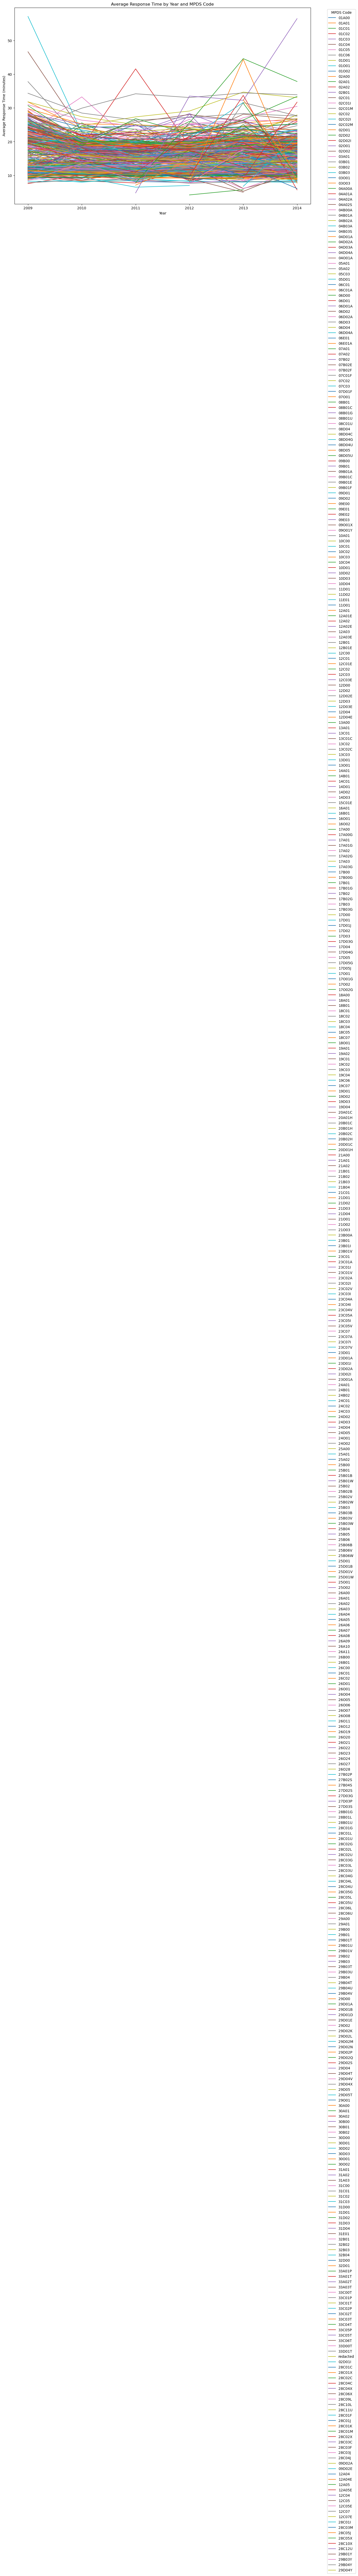

In [50]:
filtered_ambulance_raw = ambulance_raw[['Call_Year', 'MPDS_Code_Initial', 'Resp_Time']].dropna()
filtered_ambulance_raw['Resp_Time'] = pd.to_numeric(filtered_ambulance_raw['Resp_Time'], errors='coerce')
avg_resp_time_by_year_code = filtered_ambulance_raw.groupby(['Call_Year', 'MPDS_Code_Initial']).Resp_Time.mean().reset_index()
fig, ax = plt.subplots(figsize=(15, 10))
for code in avg_resp_time_by_year_code['MPDS_Code_Initial'].unique():
    code_ambulance_raw = avg_resp_time_by_year_code[avg_resp_time_by_year_code['MPDS_Code_Initial'] == code]
    if code_ambulance_raw.shape[0] > 1:  # Only plot codes with data in more than one year
        ax.plot(code_ambulance_raw['Call_Year'], code_ambulance_raw['Resp_Time'], label=code)

ax.set_xlabel('Year')
ax.set_ylabel('Average Response Time (minutes)')
ax.set_title('Average Response Time by Year and MPDS Code')
ax.legend(title='MPDS Code', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

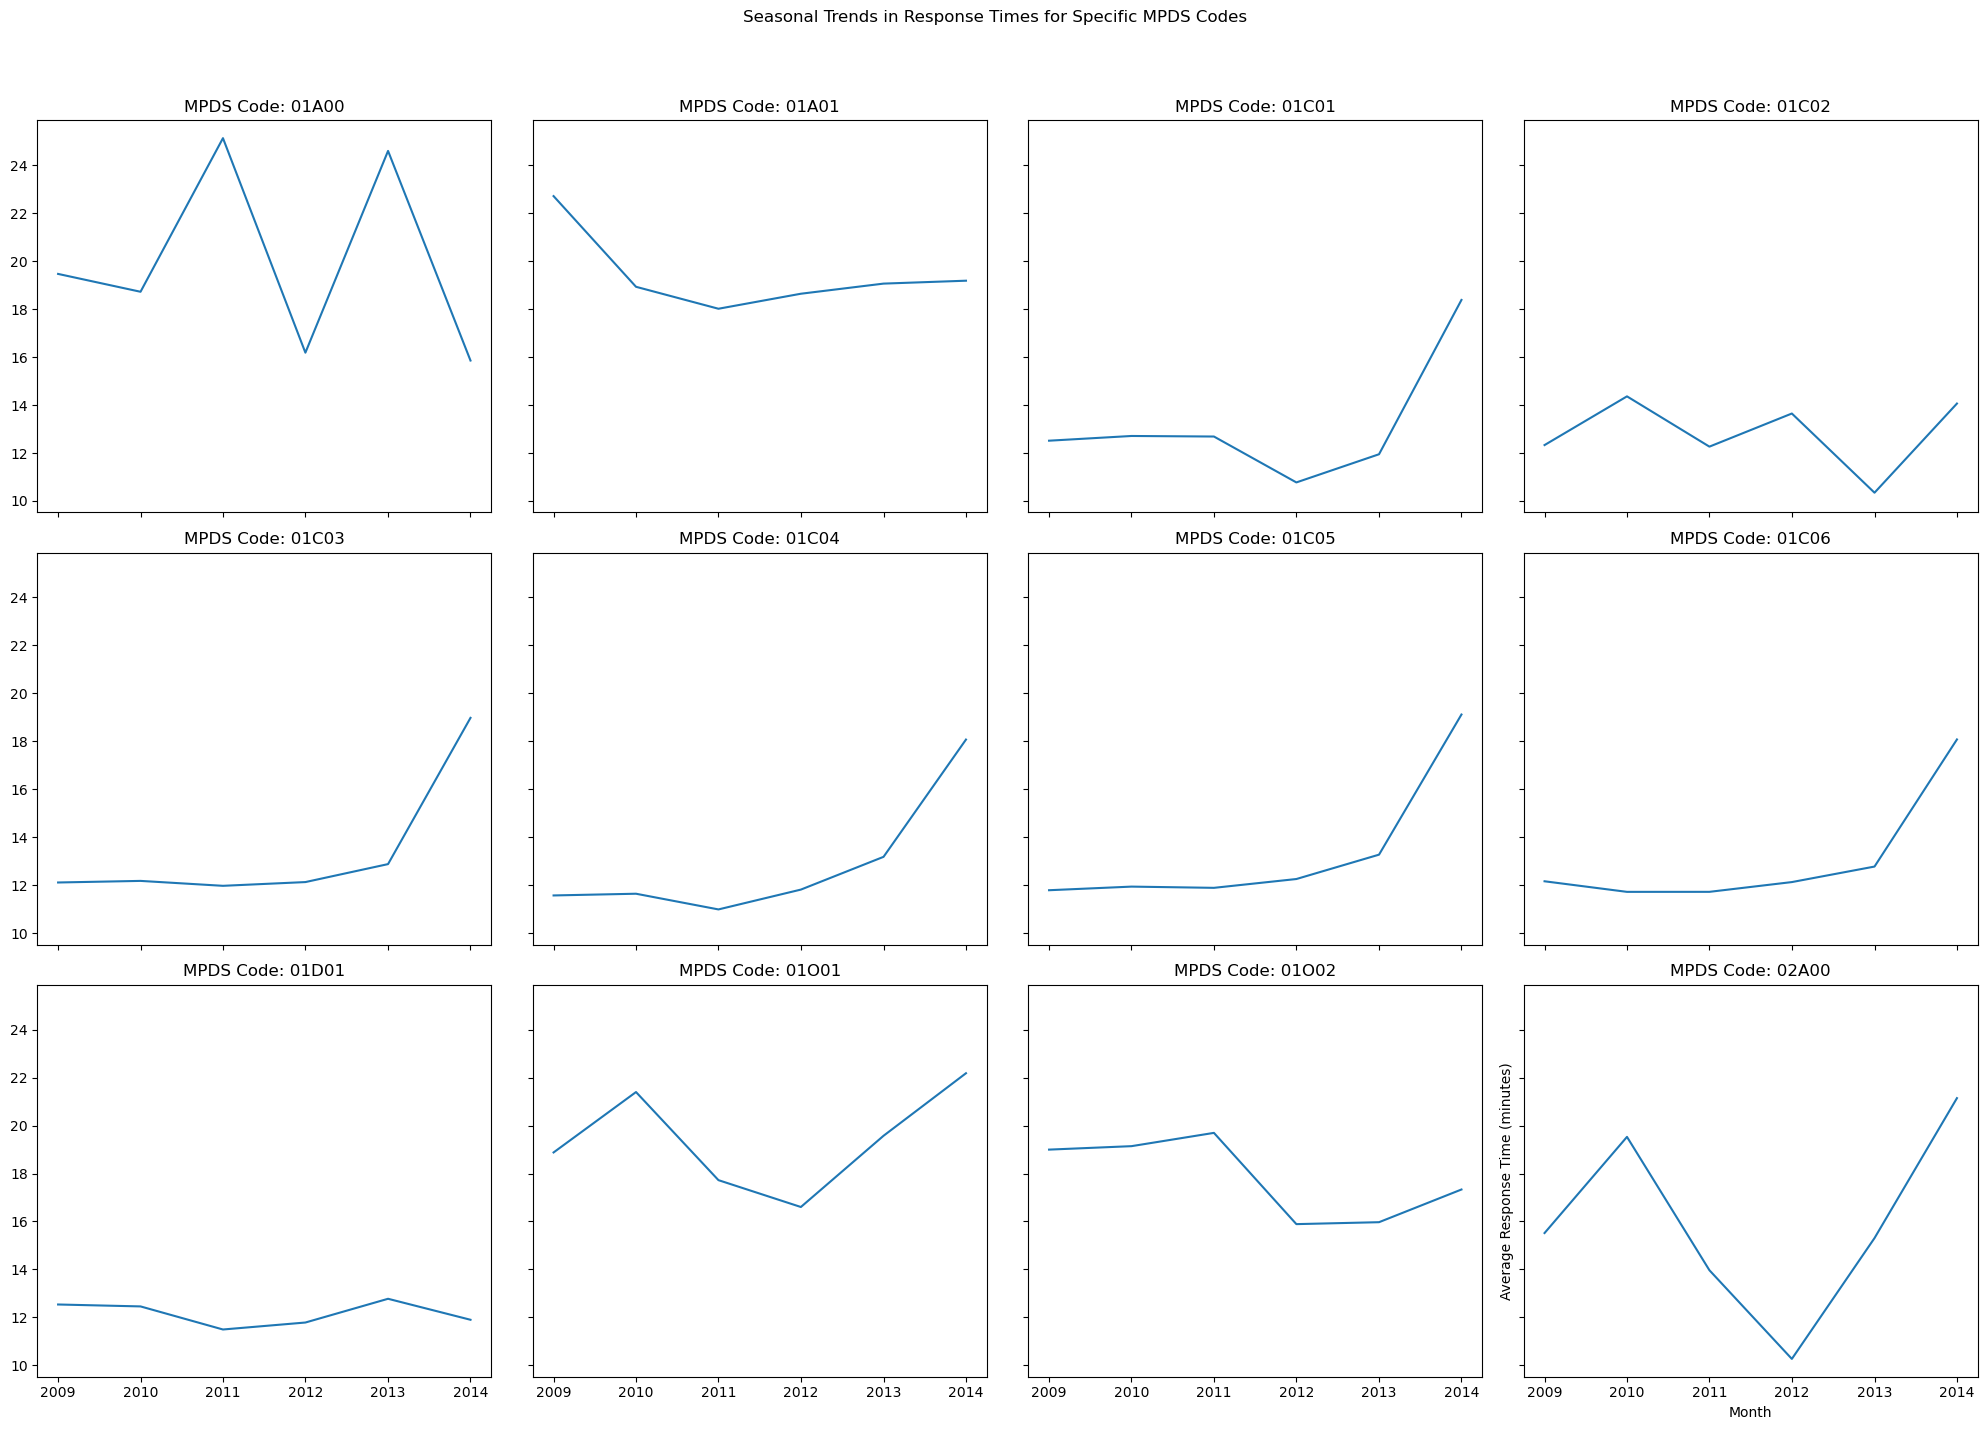

In [52]:
# Group by MPDS code and month, then calculate the average response time
avg_resp_time_by_month_code = ambulance_raw.groupby(['MPDS_Code_Initial', 'Call_Year']).Resp_Time.mean().reset_index()
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
axs = axs.flatten()

for i, code in enumerate(avg_resp_time_by_month_code['MPDS_Code_Initial'].unique()[:12]):
    code_ambulance_raw = avg_resp_time_by_month_code[avg_resp_time_by_month_code['MPDS_Code_Initial'] == code]
    axs[i].plot(code_ambulance_raw['Call_Year'], code_ambulance_raw['Resp_Time'])
    axs[i].set_title('MPDS Code: ' + code)

plt.suptitle('Seasonal Trends in Response Times for Specific MPDS Codes')
plt.xlabel('Month')
plt.ylabel('Average Response Time (minutes)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

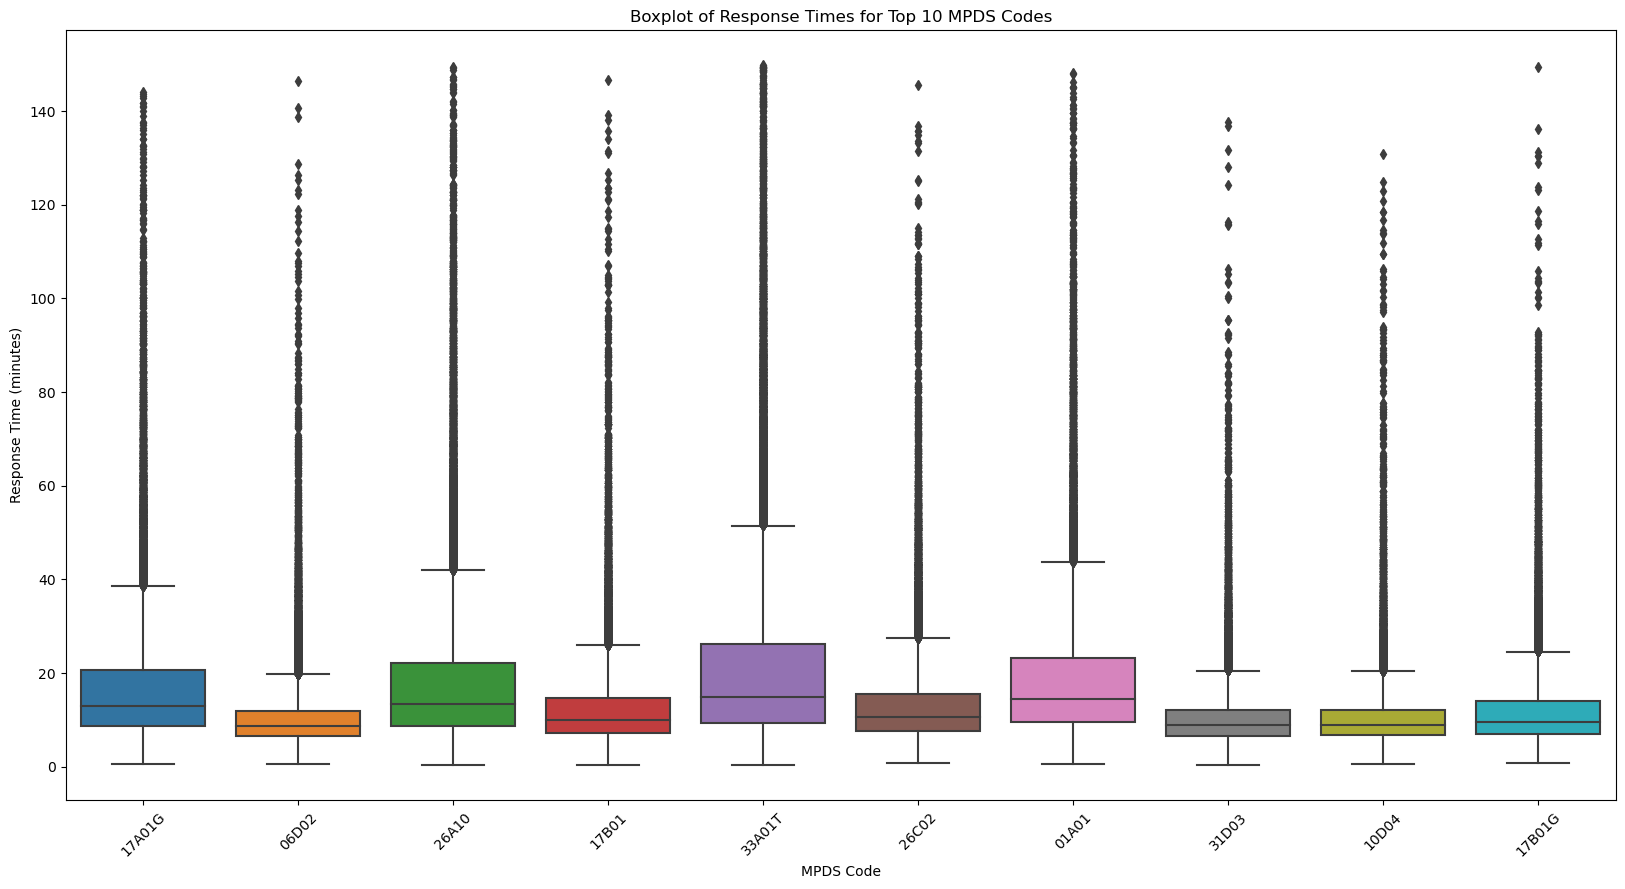

In [54]:
outlier_ambulance_raw = ambulance_raw[['MPDS_Code_Initial', 'Resp_Time']].dropna()
outlier_ambulance_raw['Resp_Time'] = pd.to_numeric(outlier_ambulance_raw['Resp_Time'], errors='coerce')
top_codes = outlier_ambulance_raw['MPDS_Code_Initial'].value_counts().head(10).index
filtered_outlier_ambulance_raw = outlier_ambulance_raw[outlier_ambulance_raw['MPDS_Code_Initial'].isin(top_codes)]

plt.figure(figsize=(20, 10))
sns.boxplot(x='MPDS_Code_Initial', y='Resp_Time', data=filtered_outlier_ambulance_raw)
plt.title('Boxplot of Response Times for Top 10 MPDS Codes')
plt.xticks(rotation=45)
plt.ylabel('Response Time (minutes)')
plt.xlabel('MPDS Code')
plt.show()

C:\Users\rzhon\AppData\Local\Temp\ipykernel_19480\1881838312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ambulance_raw['Resp_Time'] = pd.to_numeric(ambulance_raw['Resp_Time'], errors='coerce')


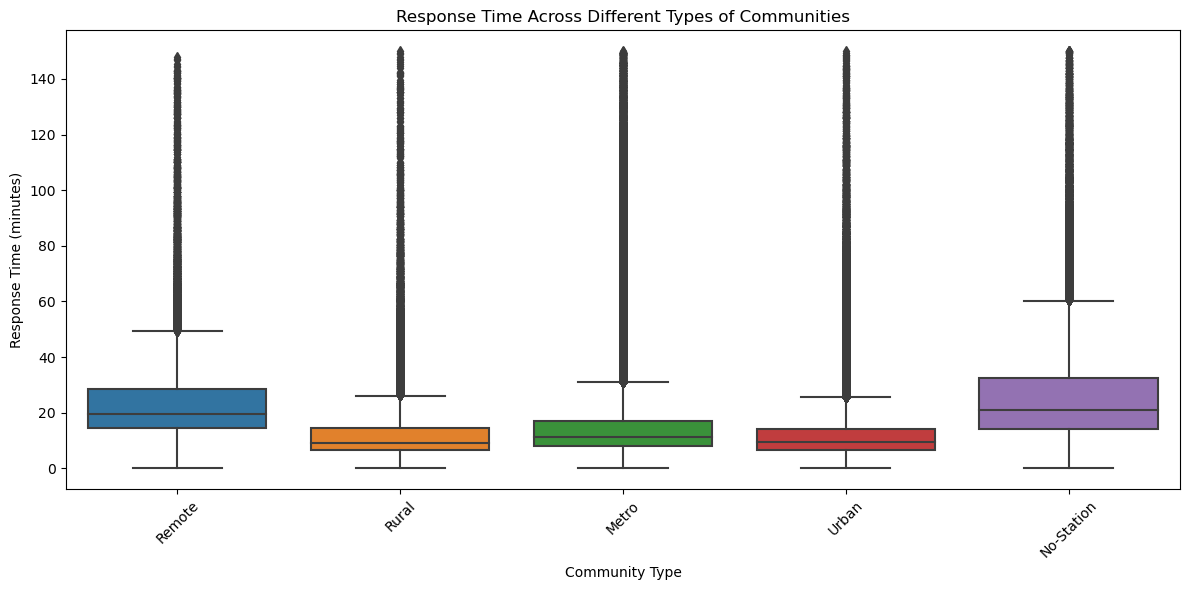

Kruskal-Wallis Test Statistic: 139837.99429764098
P-value: 0.0
Summary Statistics:   Community_Type       mean  median  min    max  range
0          Metro  15.027315    11.2  0.1  149.9  149.8
1     No-Station  26.730481    21.0  0.2  150.0  149.8
2         Remote  24.161667    19.6  0.2  147.9  147.7
3          Rural  12.282923     9.2  0.2  149.9  149.7
4          Urban  12.033159     9.4  0.2  150.0  149.8


In [56]:
from scipy.stats import kruskal
ambulance_raw['Resp_Time'] = pd.to_numeric(ambulance_raw['Resp_Time'], errors='coerce')
ambulance_raw = ambulance_raw[ambulance_raw['Resp_Time'] > 0]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Community_Type', y='Resp_Time', data=ambulance_raw)
plt.title('Response Time Across Different Types of Communities')
plt.ylabel('Response Time (minutes)')
plt.xlabel('Community Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
summary_stats = ambulance_raw.groupby('Community_Type')['Resp_Time'].describe()[['mean', '50%', 'min', 'max']].reset_index()
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
summary_stats.rename(columns={'50%': 'median'}, inplace=True)
community_types = ambulance_raw['Community_Type'].unique()
response_times = [ambulance_raw[ambulance_raw['Community_Type'] == ct]['Resp_Time'].dropna().values for ct in community_types]
stat, p = kruskal(*response_times)
print('Kruskal-Wallis Test Statistic:', stat)
print('P-value:', p)
print('Summary Statistics:\
', summary_stats)